## PCA on Home Equity Loan Dataset

* Download the HMEQ Data set
* Impute any missing numeric values. You may use a simple approach such as the mean or median.
* Create a new Data Frame that only has numeric input variables. (i.e., remove the Target variables and the categorical variables)
 
#### STANDARDIZE THE DATA
* Use StandardScaler to standardize the numeric data.
 
#### PRINCIPAL COMPONENT ANALYSIS
* Calculate the Principal Components for your numeric data.
* Use a Scree Plot (or some other approach) to determine the appropriate number of Principal Components. **Note that you will need at LEAST 2 Principal Components to complete this assignment. So choose a value of at least 2.**
* Convert your Principal Component data set into a Data Frame
* Reduce the size of your Data Frame to the number of PC's that you decided upon
* Name the columns PC_1, PC_2, etc.
* Append the Targets Variables and the Categorical Variables

* **Interpret the PRINCIPAL COMPONENTS**
* Select at least one of the principal components, print it's weight values
* Attempt to interpret the coefficients. In other words, does it tell a story?

* **Plot the PRINCIPAL COMPONENTS**
* Create a scatter plot with PC_1 as the X-Axis and PC_2 as the Y_Axis.
* Using one of the categorical variables (or the Target Flag), color the dots in the scatter plot.
  - Note whether or not the Principal Components predict the categorical variables.
  - If you selected more than 2 PC's, feel free to experiment by using different PC's and determining if they predict the target.

In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Read in dataset
HMEQ = 'HMEQ_Loss.csv'
X_df = pd.read_csv(HMEQ)

In [ ]:
# Inspect DataFrame
X_df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Store column names in new variable
varNames = X_df.columns
varNames

Index(['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT', 'LOAN', 'MORTDUE', 'VALUE',
       'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC'],
      dtype='object')

In [ ]:
# Remove string object variables
TARGET_BF = 'TARGET_BAD_FLAG'
TARGET_LA = 'TARGET_LOSS_AMT'
REASON = 'REASON'
JOB = 'JOB'

In [ ]:
# Remove target variables and categorical variables
X_df = X_df.drop([TARGET_BF, TARGET_LA, REASON, JOB], axis=1)

In [ ]:
# Verify Drop
X_df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Impute Missing Values
* Must do before standardizing dataset

NOTES:
* Main DataFrame: X_df
* dtypes stored in: X
* Numeric list object: X_numList

In [ ]:
# Create new DataFrame of num dtypes
X = X_df.dtypes

# Store num types in numList
X_numList = []

# Loop through index and store in numList
# Remove 
for i in X.index:
  if i in ([TARGET_BF, TARGET_LA, JOB, REASON]): continue
  if X[i] in (['float64', 'int64']): X_numList.append(i)

print('Numeric variables:\n', X_numList)

Numeric variables:
 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
# Fill in missing values using an appropiate method
for i in X_numList: 
  '''CLAGE is credit line age in months'''
  if X_df[i].isna().sum() == 0: continue
  mean_value = X_df['CLAGE'].mean()
  X_df['CLAGE'] = X_df['CLAGE'].fillna(value=mean_value)

  '''CLNO is # of credit lines'''
  mean_value = X_df['CLNO'].mean()
  X_df['CLNO'] = X_df['CLNO'].fillna(value=mean_value)

  '''NINQ is # of credit inquiries'''
  mean_value = X_df['NINQ'].mean()
  X_df['NINQ'] = X_df['NINQ'].fillna(value=mean_value)

  '''DELINQ is # of delinquencies on credit report (last 3 yrs)'''
  mean_value = X_df['DELINQ'].mean()
  X_df['DELINQ'] = X_df['DELINQ'].fillna(value=mean_value)

  '''DEBTINC is DTI ratio (%)'''
  mean_value = X_df['DEBTINC'].mean()
  X_df['DEBTINC'] = X_df['DEBTINC'].fillna(value=mean_value)

  '''DEROG is # of bad marks on credit report (last 7 yrs)'''
  mean_value = X_df['DEROG'].mean()
  X_df['DEROG'] = X_df['DEROG'].fillna(value=mean_value)

  '''YOJ is # yrs of employment'''
  mean_value = X_df['YOJ'].mean()
  X_df['YOJ'] = X_df['YOJ'].fillna(value=mean_value)
  
  '''VALUE is # yrs of employment'''
  mean_value = X_df['VALUE'].mean()
  X_df['VALUE'] = X_df['VALUE'].fillna(value=mean_value)

  '''MORTDUE amount of mortgage owed'''
  mean_value = X_df['MORTDUE'].mean()
  X_df['MORTDUE'] = X_df['MORTDUE'].fillna(value=mean_value)

  '''LOAN amount of mortgage owed'''
  mean_value = X_df['LOAN'].mean()
  X_df['LOAN'] = X_df['LOAN'].fillna(value=mean_value)
  break

In [ ]:
# Verify fillna
X_df.isna().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### Standardize Dataset
 * Must do before PCA 

Notes: 
  * Array that stores the scaled and transformed X_df data: X_STD 

In [ ]:
# Standardize the data (i.e., substract mean, divide stddev, +/- 3)
# This method rescales variables
theScaler = StandardScaler()
theScaler.fit(X_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_STD = theScaler.transform(X_df)

In [ ]:
# Confirms number of variables to perform PCA
MAX_N = X_STD.shape[1]
MAX_N

10

In [ ]:
type(X_STD)

numpy.ndarray

### Perform PCA

In [ ]:
# Create PCs
pca = PCA(n_components=MAX_N)
pca.fit(X_STD)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Inspect eigenvalues
# This tells us how much information is in each PC
eigenval = pca.explained_variance_
print('Eigen Values:')
print(eigenval)

Eigen Values:
[2.20903156 1.40677622 1.24252493 1.00465852 0.96795576 0.84522852
 0.77582273 0.71390901 0.63053507 0.20523582]


In [ ]:
# Identify relevant PCs for analysis
varPCT = []
totPCT = []
total = 0

for i in eigenval:
  total = total + i
  VAR = int(i / len(eigenval) * 100)
  PCT = int(total / len(eigenval) * 100)
  varPCT.append(VAR)
  totPCT.append(PCT)
  print(round(i, 2), 'variation=', VAR, '%', 'total=', PCT, '%')

2.21 variation= 22 % total= 22 %
1.41 variation= 14 % total= 36 %
1.24 variation= 12 % total= 48 %
1.0 variation= 10 % total= 58 %
0.97 variation= 9 % total= 68 %
0.85 variation= 8 % total= 76 %
0.78 variation= 7 % total= 84 %
0.71 variation= 7 % total= 91 %
0.63 variation= 6 % total= 97 %
0.21 variation= 2 % total= 100 %


### SCREE Plot
* Visualize eigenvalues or PCs

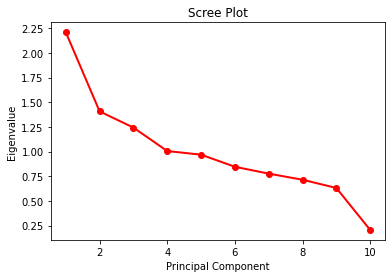

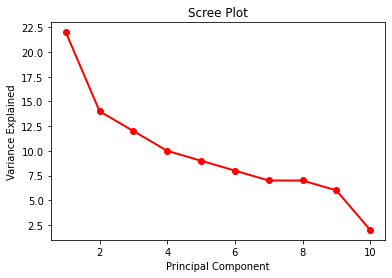

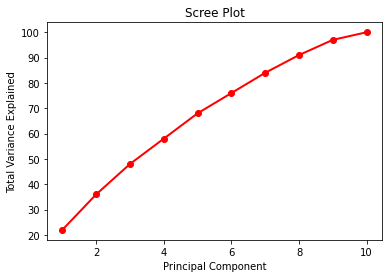

In [ ]:
# Create SCREE Plot
# Notes: arange will give you 0-10(MAX_N of PCs); +1 will give 0-11 but capture 10th PCs
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM , eigenval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

### Convert PC dataset (eigenval) into a DataFrame

In [ ]:
# Convert PC dataset (eigenval) into a DataFrame
dfc = pd.DataFrame(pca.components_)
dfc.columns = list(X_df.columns)
print(dfc.T)

                0         1         2  ...         7         8         9
LOAN     0.316157 -0.085506 -0.058048  ... -0.559959 -0.216561 -0.104324
MORTDUE  0.572706  0.012686 -0.210628  ...  0.241614  0.131950 -0.690655
VALUE    0.587073 -0.058910 -0.172060  ...  0.203326  0.143431  0.710782
YOJ      0.028198 -0.328279  0.507770  ...  0.565175 -0.077200 -0.060564
DEROG   -0.028835  0.511672  0.229386  ...  0.310006  0.053617 -0.013955
DELINQ   0.039820  0.367929  0.508660  ... -0.278075  0.193360  0.002574
CLAGE    0.234275 -0.329736  0.476089  ... -0.291827  0.511347 -0.021518
NINQ     0.040901  0.507145 -0.043158  ... -0.032243  0.196703  0.024526
CLNO     0.367464  0.184683  0.334482  ... -0.053116 -0.718996  0.044354
DEBTINC  0.180551  0.289968 -0.114357  ...  0.069643  0.227533  0.001035

[10 rows x 10 columns]


In [ ]:
# Generate PC values
X_PCA = pca.transform(X_STD) 

# Create PC DataFrame
X_PCA = pd.DataFrame(X_PCA)

In [ ]:
# Inspect DataFrame
# Read PCs row-wise PC0, PC1, PC2.....
X_PCA.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.487482,-0.154033,-0.553363,-0.236149,0.481440,0.143878,-0.390052,0.885953,0.260009,0.111701
1,-1.284904,0.350671,0.192724,-1.378032,-0.098753,1.157048,-1.009796,0.336696,0.553678,-0.206891
2,-2.707319,-0.041734,-0.534944,-0.713565,0.575454,-0.200819,0.113075,0.010519,0.491793,0.074416
3,-0.482648,0.130534,0.088617,-1.009364,0.238630,-0.295851,-0.209732,0.854837,0.330604,0.159261
4,-0.619048,-0.082542,-1.471846,-1.376582,-0.174272,0.441983,-0.276338,0.937055,0.249294,-0.080535


In [ ]:
# Another way of viewing PCs via slicing
X_PCA = X_PCA.iloc[:,:]
X_PCA

,0,1,2,3,4,5,6,7,8,9
0,-2.487482,-0.154033,-0.553363,-0.236149,0.481440,0.143878,-0.390052,0.885953,0.260009,0.111701
1,-1.284904,0.350671,0.192724,-1.378032,-0.098753,1.157048,-1.009796,0.336696,0.553678,-0.206891
2,-2.707319,-0.041734,-0.534944,-0.713565,0.575454,-0.200819,0.113075,0.010519,0.491793,0.074416
3,-0.482648,0.130534,0.088617,-1.009364,0.238630,-0.295851,-0.209732,0.854837,0.330604,0.159261
4,-0.619048,-0.082542,-1.471846,-1.376582,-0.174272,0.441983,-0.276338,0.937055,0.249294,-0.080535
...,...,...,...,...,...,...,...,...,...,...
5955,1.609102,-1.708184,0.019748,4.558041,-0.471808,1.605427,1.183277,-3.151797,-1.044195,-0.638631
5956,1.524419,-1.688994,-0.080352,4.621401,-0.537516,1.674541,1.120154,-3.113391,-1.063049,-0.562558
5957,1.521755,-1.670999,-0.123875,4.558714,-0.582825,1.636267,1.158370,-3.219827,-1.045020,-0.548547
5958,1.486962,-1.664210,-0.114658,4.495590,-0.687929,1.541891,1.183681,-3.374657,-1.158700,-0.495428


In [ ]:
# Name PCs for ease of viewing
colNames = X_PCA
pcaNames = []

# Loop through list
for i in colNames:
  index = int(i) + 1 #Python starts at 0, but we want to start at 1
  theName = 'PC_' + str(index)
  pcaNames.append(theName)

# Append list of pcaNames to X_PCA.columns
X_PCA.columns = pcaNames
print(X_PCA.head())

       PC_1      PC_2      PC_3  ...      PC_8      PC_9     PC_10
0 -2.487482 -0.154033 -0.553363  ...  0.885953  0.260009  0.111701
1 -1.284904  0.350671  0.192724  ...  0.336696  0.553678 -0.206891
2 -2.707319 -0.041734 -0.534944  ...  0.010519  0.491793  0.074416
3 -0.482648  0.130534  0.088617  ...  0.854837  0.330604  0.159261
4 -0.619048 -0.082542 -1.471846  ...  0.937055  0.249294 -0.080535

[5 rows x 10 columns]


In [ ]:
# Append target variables (for flag and loss) and categorical variables REASON and JOB to X_PCA
df = pd.read_csv(HMEQ)
X_PCA['TARGET_BF'] = df.TARGET_BAD_FLAG
X_PCA['TARGET_LA'] = df.TARGET_LOSS_AMT
X_PCA['REASON'] = df.REASON
X_PCA['JOB'] = df.JOB

In [ ]:
# Impute missing values for target and categorical variables
df_dtypes = df.dtypes

objList = []

for i in df_dtypes.index:
  if i in ([TARGET_BF, TARGET_LA]): continue
  if df_dtypes[i] in (['object']): objList.append(i)

print('Non-numeric variables:\n', objList,'\n')

Non-numeric variables:
 ['REASON', 'JOB'] 



### Impute missing values for any target and categorical variables and append to X_PCA DataFrame

In [ ]:
# Fill in missing values for objList
for i in objList:
  '''REASON is purpose of loan request'''
  X_PCA['REASON'] = X_PCA['REASON'].fillna(method='ffill')
 
  '''JOB is applicant's occupation'''
  X_PCA['JOB'] = X_PCA['JOB'].fillna(method='ffill')
  break

# Fill in missing values for TARGET_LA or TARGET_LOSS_AMT
median_value = X_PCA['TARGET_LA'].median()
X_PCA['TARGET_LA'] = X_PCA['TARGET_LA'].fillna(value=median_value)

In [ ]:
# Verify target and categorical variables were added to X_PCA
X_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,TARGET_BF,TARGET_LA,REASON,JOB
0,-2.487482,-0.154033,-0.553363,-0.236149,0.481440,0.143878,-0.390052,0.885953,0.260009,0.111701,1,641.0,HomeImp,Other
1,-1.284904,0.350671,0.192724,-1.378032,-0.098753,1.157048,-1.009796,0.336696,0.553678,-0.206891,1,1109.0,HomeImp,Other
2,-2.707319,-0.041734,-0.534944,-0.713565,0.575454,-0.200819,0.113075,0.010519,0.491793,0.074416,1,767.0,HomeImp,Other
3,-0.482648,0.130534,0.088617,-1.009364,0.238630,-0.295851,-0.209732,0.854837,0.330604,0.159261,1,1425.0,HomeImp,Other
4,-0.619048,-0.082542,-1.471846,-1.376582,-0.174272,0.441983,-0.276338,0.937055,0.249294,-0.080535,0,11003.0,HomeImp,Office


### Create a scatter plot with PC_1 as X-Axis and PC_2 as Y-Axis; select a categorical variable or target variable, color dots in the scatter plot 

In [ ]:
# for Name, Group in X_PCA.groupby('TARGET_LA'):
#   print(Group.head(1).T)

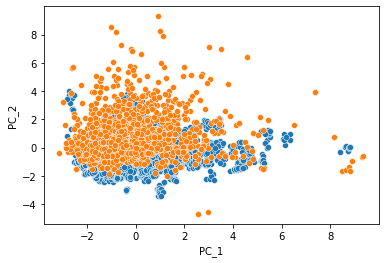

In [ ]:
for Name, Group in X_PCA.groupby('TARGET_BF'):
  sns.scatterplot(x = Group.PC_1, y = Group.PC_2)

No handles with labels found to put in legend.


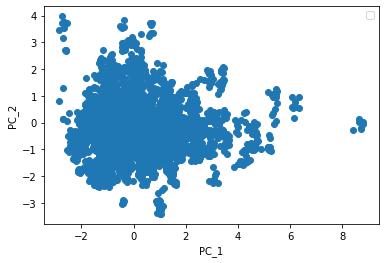

No handles with labels found to put in legend.


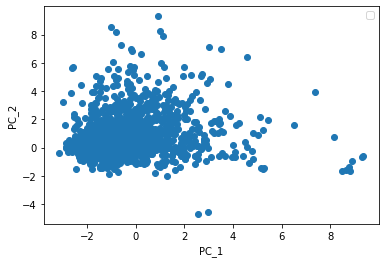

In [ ]:
for Name, Group in X_PCA.groupby('TARGET_BF'):
  plt.scatter(x = Group.PC_1, y = Group.PC_2)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  # plt.legend() # No handles with labels found to put in legend
  plt.show()

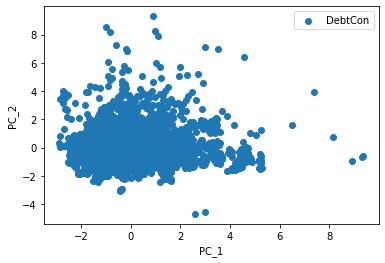

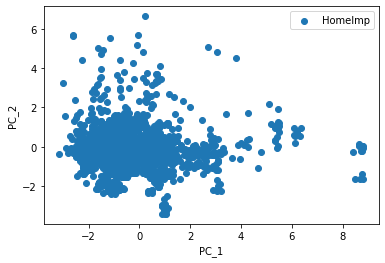

In [ ]:
for Name, Group in X_PCA.groupby(['REASON']):
  plt.scatter(Group.PC_1, Group.PC_2, label=Name)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.legend()
  plt.show()

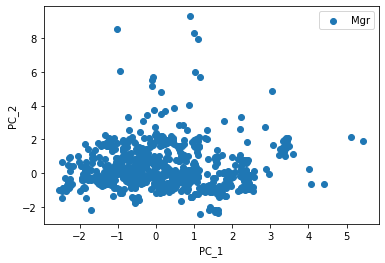

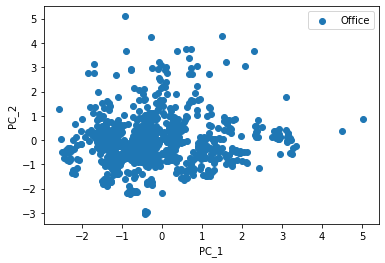

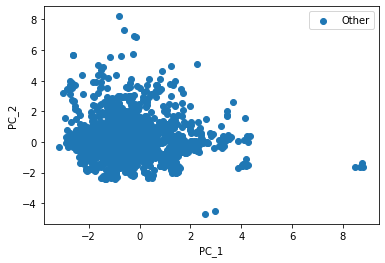

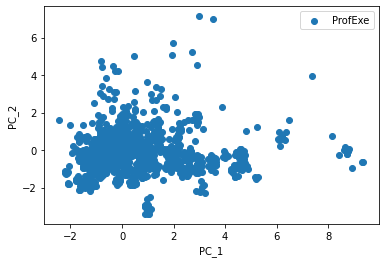

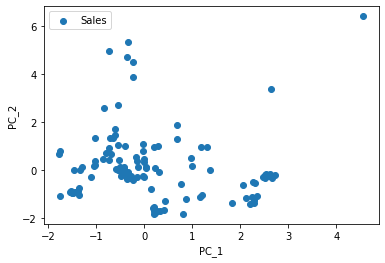

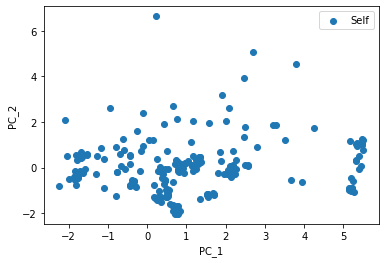

In [ ]:
for Name, Group in X_PCA.groupby(['JOB']):
  plt.scatter(Group.PC_1, Group.PC_2, label=Name)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.legend()
  plt.show()